In [31]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ammfat/datasets/main/mushrooms.csv')

df.tail()

In [7]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Data Preprocessing

In [8]:
encoder = LabelEncoder()

In [18]:
for col in df.columns:
  df[col] = encoder.fit_transform(df[col])

In [22]:
#df.iloc[rows_start:rows_end, cols_start:cols_end]

x_features = df.iloc[:,1:23]
y_target = df.iloc[:,0]

In [24]:
scaler = StandardScaler()
x_features = scaler.fit_transform(x_features)

In [28]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2
8123,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,4,1,2


PCA

In [25]:
pca = PCA()

res_pca = pca.fit_transform(x_features)
pca_variance = pca.explained_variance_

In [26]:
pca_variance

array([3.87410924e+00, 2.60339434e+00, 2.40073834e+00, 2.16674719e+00,
       1.70303181e+00, 1.39495575e+00, 9.78803667e-01, 9.51936841e-01,
       7.70036405e-01, 7.11748353e-01, 5.77556532e-01, 5.42484855e-01,
       5.09631267e-01, 4.77214086e-01, 3.84467203e-01, 3.11228233e-01,
       2.18649656e-01, 1.59514884e-01, 1.31521687e-01, 7.31993474e-02,
       6.16155691e-02, 7.90604723e-34])

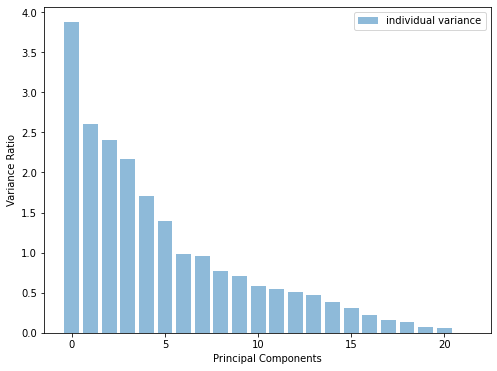

In [32]:
plt.figure(figsize=(8, 6))

plt.bar(range(22), pca_variance, alpha=0.5, align='center', label='individual variance')

plt.legend()
plt.ylabel('Variance Ratio')
plt.xlabel('Principal Components')

plt.show()

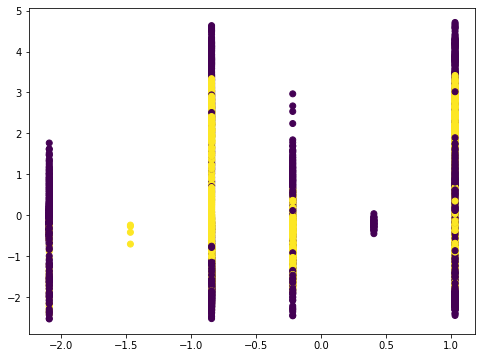

In [35]:
plt.figure(figsize=(8,6))

plt.scatter(x_features[:,0], res_pca[:,1], c=df['class'])
plt.show()